In [1]:
# -*- coding:UTF-8 -*- ＃
#导入模块
import time
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster,datasets
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron


In [2]:
# 拉伸至0-255
def guiyihua(x):
    minx=np.min(x)
    maxX=np.max(x)
    x=(x-minx)/(maxX-minx)
    return x;

def classtransform(x):
    for i in range(0,len(x)):
        if(x[i]>0):
            x[i]=1
        else:
            x[i]=-1
    return x;


def MultiplyDW(D,W):
    for i in range(0,len(D)):
       D[i]=D[i]*W[i]
    return D;
    

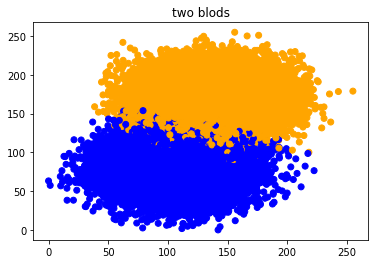

In [3]:
# picture 1  two blobs
n_samples = 50000

X,m = datasets.make_blobs(n_samples=n_samples, centers=2, n_features=2, cluster_std=2, random_state=2)
xa=X[:, 0]
xb=X[:, 1]

marray = np.array(m).ravel()

marraytr=classtransform(marray)

x1=255*guiyihua(xa)
x2=255*guiyihua(xb)

cm_bright = ListedColormap(['Blue', 'Orange'])

rand_X =list(zip(x1,x2))

plt.figure()
plt.scatter(x1, x2, c=marraytr, cmap=cm_bright,label='mydata')


plt.title('two blods')
plt.show()


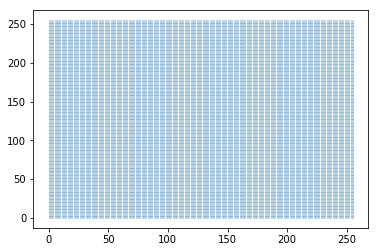

In [4]:
x = np.linspace(0,255,256)
y = np.linspace(0,255,256)
X,Y = np.meshgrid(x,y)
points = [point for point in zip(X.flat,Y.flat)]

plt.figure()
plt.scatter(X.flat,Y.flat,s=0.009)
plt.show()

#np.random.shuffle(points)
parray = np.array(points)


# SGD 损失函数

[-12.28480848 -35.42699676   2.47844806 ...,  26.81206381 -22.14955797
  10.25163573]


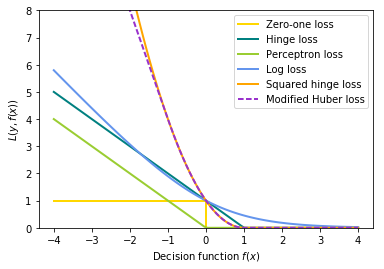

[-0.24647086 -0.71553309  0.05276127 ...,  0.5459722  -0.44641657
  0.21031373]


In [5]:

SGDclf = SGDClassifier(loss="log", alpha=0.01, n_iter=200, fit_intercept=True)
SGDclf.fit(rand_X, marraytr)

GX = SGDclf.decision_function(rand_X)

# 收缩至-1-1
def ZoomIN(x):
    minx=np.min(x)
    maxX=np.max(x)
    x=(2*(x-minx)/(maxX-minx))-1
    return x;

GXNor=ZoomIN(GX)
print(GX)
HX=[]
for i in range(0,len(GXNor)):
    if(marray[i]>0):
        HX.append(GXNor[i]*1)
    else:
        HX.append(GXNor[i]*(-1))

plt.figure()

def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss

xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=lw,label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=lw,label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=lw,label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=lw,label="Squared hinge loss")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=lw,linestyle='--', label="Modified Huber loss")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y, f(x))$")
plt.show()

#print(HX)
GXNorZI=np.array(GXNor)
print(GXNorZI)

#  训练样本的（归一化）损失值

[-0.02139053 -0.60066017 -0.29229443 ..., -0.71258739 -0.25560121
 -0.4395051 ]
0.503599389293
-1.0


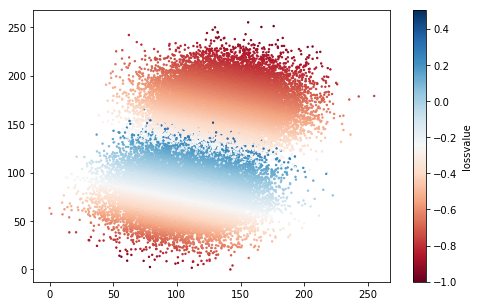

In [6]:
Hingeloss=np.where(GXNorZI < 1, 1 - GXNorZI, 0)
Perceptronloss=-np.minimum(GXNorZI, 0)
Logloss=np.log2(1 + np.exp(-GXNorZI))
Squaredhingeloss=np.where(GXNorZI < 1, 1 - GXNorZI, 0)**2
ModifiedHuberloss=modified_huber_loss(GXNorZI, 1)
             
plt.figure(figsize=(8,5))
cor=plt.cm.get_cmap('RdBu')

lossvalue=MultiplyDW(ZoomIN(Logloss),marraytr)
print(lossvalue);print(np.max(lossvalue));print(np.min(lossvalue))

sct=plt.scatter(x1, x2,c=lossvalue,cmap=cor,s=2)
plt.colorbar(sct,label='lossvalue')
plt.show()

# 假设测试样本分别为正类或负类的（归一化）损失值

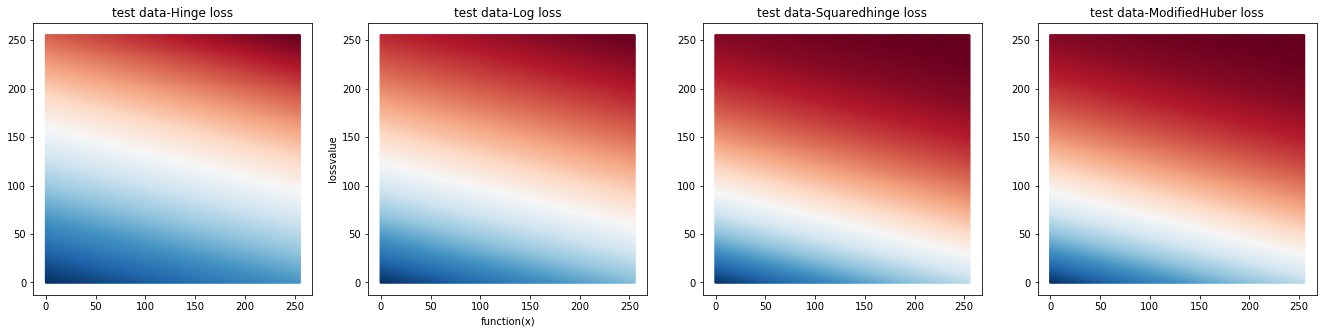

In [7]:
TestHX= SGDclf.decision_function(parray)

TestGXNor=ZoomIN(TestHX)
TestGXNorZI=np.array(TestGXNor)

#print(TestGXNorZI)
#print(len(TestGXNorZI))
HingelossTest=np.where(TestGXNorZI < 1, 1 - TestGXNorZI, 0)
PerceptronlossTest=-np.minimum(TestGXNorZI, 0)
LoglossTest=np.log2(1 + np.exp(-TestGXNorZI))
SquaredhingelossTest=np.where(TestGXNorZI < 1, 1 - TestGXNorZI, 0)**2
ModifiedHuberlossTest=modified_huber_loss(TestGXNorZI, 1)

cor=plt.cm.get_cmap('RdBu')
plt.figure(figsize=(23,5))

plt.subplot(141)
lossvalue=ZoomIN(HingelossTest)
plt.scatter(parray[:,0], parray[:,1],c=lossvalue,cmap=cor,s=2)
plt.title('test data-Hinge loss')

ax=plt.subplot(142)
#lossTest=1/LoglossTest
lossvalue=ZoomIN(LoglossTest)
ax.scatter(parray[:,0], parray[:,1],c=lossvalue,cmap=cor,s=2)
ax.set_xlabel('function(x)')
ax.set_ylabel('lossvalue')
ax.set_title('test data-Log loss')

plt.subplot(143)
lossvalue=ZoomIN(SquaredhingelossTest)
plt.scatter(parray[:,0], parray[:,1],c=lossvalue,cmap=cor,s=2)
plt.title('test data-Squaredhinge loss')

plt.subplot(144)
lossvalue=ZoomIN(ModifiedHuberlossTest)
plt.scatter(parray[:,0], parray[:,1],c=lossvalue,cmap=cor,s=2)
plt.title('test data-ModifiedHuber loss')

# plt.legend(loc='upper right')
plt.show()